# Visualization of graphs (RGG, MST) on a parabolic surface (and with random elevation)

Paper: Surfacic networks

Barthelemy et al., PNAS Nexus 2025

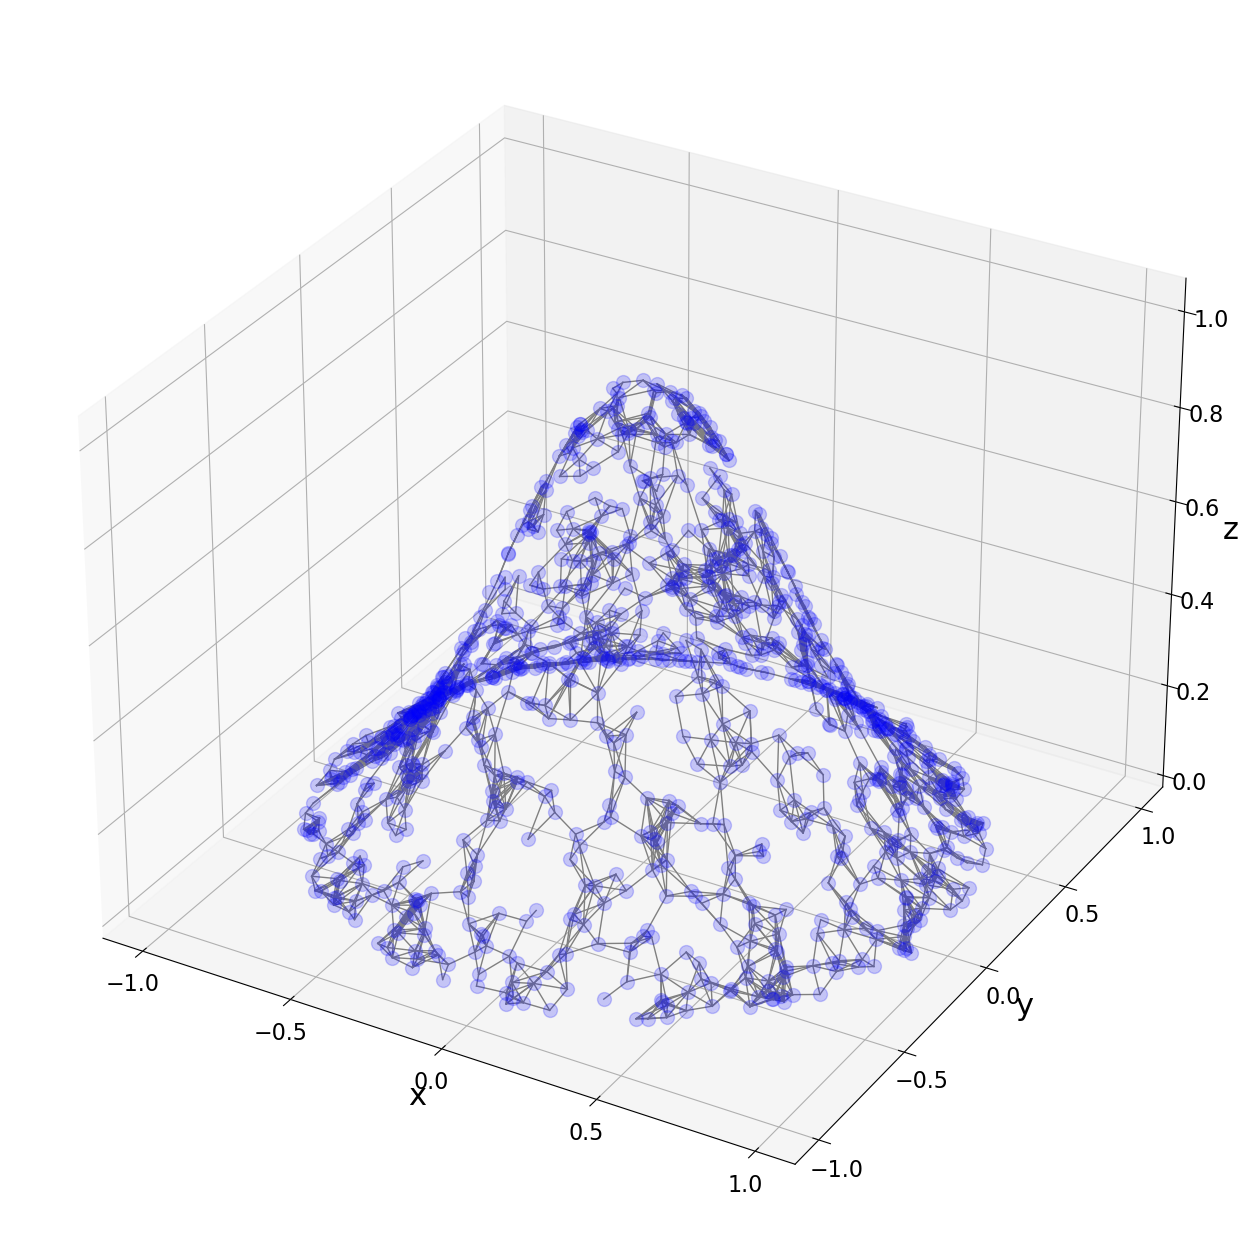

In [52]:
# random geometric graoph RGG
#To plot a random geometric graph with nodes distributed in 3D space, you can use NetworkX 
# to generate the graph and Matplotlib to visualize it. Here's a Python code to achieve this:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker


# Generate random geometric graph
num_nodes = 1000
radius = 0.1

#positions = {i: np.random.uniform(-radius, radius, size=3) for i in range(num_nodes)}
#print('pos= ',positions)

# generate random points
z_max = 1.0
sigma = 0.4
r = np.random.uniform(low=0, high=1, size=num_nodes)  # radius
theta = np.random.uniform(low=0, high=2*np.pi, size=num_nodes)  # angle
x = np.sqrt(r) * np.cos(theta)
y = np.sqrt(r) * np.sin(theta)
#z = z_max*(1.0 - np.square(x)-np.square(y))
z = z_max * np.exp(-0.5*(np.square(x)+np.square(y))/sigma**2) 

# read positions
#nplist = np.arange(start=0, stop=num_nodes, step=1)
#df_pos = pd.DataFrame({'node_i': nplist,'x': x, 'y': y, 'z':z})
## from df pos create dictionary
#positions = {x[0]: x[1:3] for x in df_pos.itertuples(index=False)}

positions = {i: (x[i],y[i],z[i]) for i in range(num_nodes)}
#print('pos2= ',positions)

#break

# create random graph
G = nx.random_geometric_graph(num_nodes, radius, pos=positions)
#G = nx.grid_2d_graph(num_nodes, num_nodes, periodic=False, create_using=None)

# Extract node positions
pos = nx.get_node_attributes(G, 'pos')

# Plot the graph
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

# Plot nodes
for node, position in pos.items():
    ax.scatter(position[0], position[1], position[2], color='b',s=100,alpha=0.2)

# Plot edges
for edge in G.edges():
    ax.plot([pos[edge[0]][0], pos[edge[1]][0]],
            [pos[edge[0]][1], pos[edge[1]][1]],
            [pos[edge[0]][2], pos[edge[1]][2]], color='grey',linewidth=1)

# Set labels and title
ax.set_xlabel('x',fontsize=22)
ax.set_ylabel('y',fontsize=22)
ax.set_zlabel('z',fontsize=22)
#ax.set_title('Random Geometric Graph on a gaussian surface')
tick_spacing = 0.5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.zaxis.set_tick_params(labelsize=16)

# Get rid of colored axes planes
# First remove fill
#ax.xaxis.pane.fill = False
#ax.yaxis.pane.fill = False
#ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
#ax.xaxis.pane.set_edgecolor('w')
#ax.yaxis.pane.set_edgecolor('w')
#ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
#ax.grid(False)


plt.show()


pos2=  {0: (0.5702005161815012, -0.03995955583508834, 0.03367767062745728), 1: (0.1334752620880997, -0.7665810959697535, 0.0010331627008169297), 2: (-0.513374241939939, 0.22635499257811778, 0.039096434463307364), 3: (-0.7756543333490351, 0.5506311913616929, 2.4489104803170562e-05), 4: (0.09555419237368175, -0.6074942706517386, 0.017701578255926737), 5: (-0.03617530636671471, 0.7285754777140248, 0.002583813647761194), 6: (0.3395227628566231, -0.5116452562164573, 0.01795188773517288), 7: (-0.10755507611669886, 0.6603922432672202, 0.007424811836390109), 8: (-0.43039234343819216, 0.8714532807931791, 1.4884238954821379e-05), 9: (0.792961063059656, 0.5342603683382077, 2.1777784263423326e-05), 10: (-0.5798682018785568, 0.2763830400703212, 0.011507149118406758), 11: (-0.6926483335210117, -0.5183130290753445, 0.0001730414849310914), 12: (-0.0921215039269452, 0.0686334110829488, 1.695852769265563), 13: (-0.17298406968340294, 0.6416012190374202, 0.008014138558420784), 14: (-0.09305937613372661, -

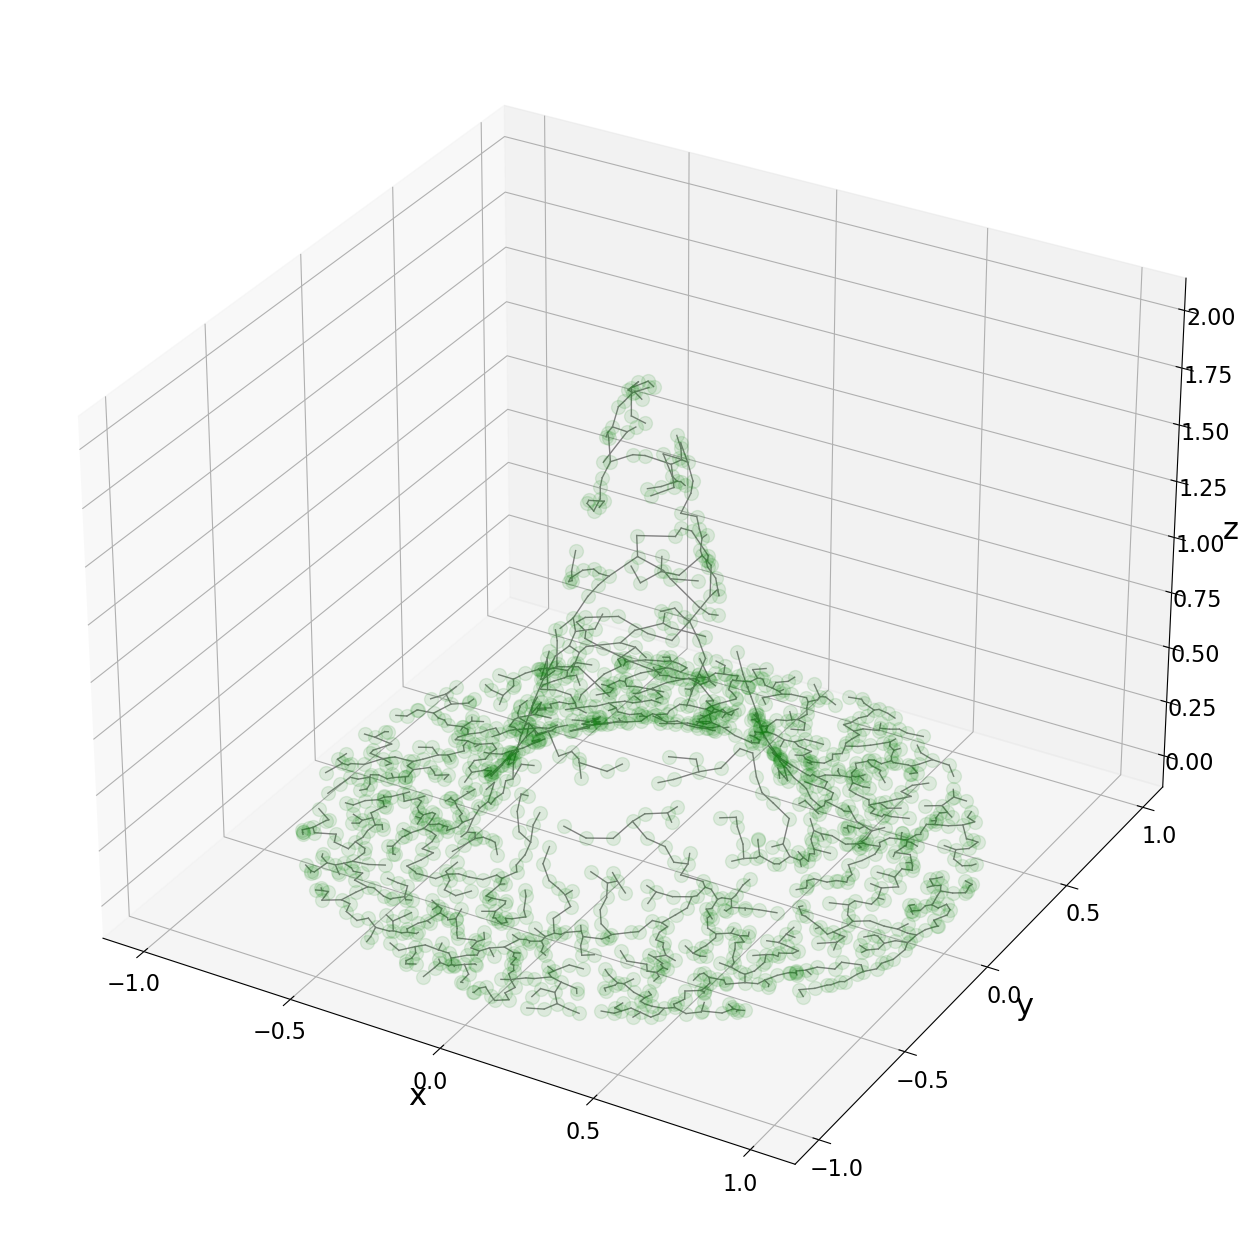

In [82]:

# MST
#To plot a random geometric graph with nodes distributed in 3D space, you can use NetworkX to generate the graph and Matplotlib to visualize it. Here's a Python code to achieve this:
# minimum spanning tree 

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker


# Generate random geometric graph
num_nodes = 1500
radius = 0.1

#positions = {i: np.random.uniform(-radius, radius, size=3) for i in range(num_nodes)}
#print('pos= ',positions)

# generate random points
z_max = 2.0
sigma = 0.2
r = np.random.uniform(low=0, high=1, size=num_nodes)  # radius
theta = np.random.uniform(low=0, high=2*np.pi, size=num_nodes)  # angle
x = np.sqrt(r) * np.cos(theta)
y = np.sqrt(r) * np.sin(theta)
#z = z_max*(1.0 - np.square(x)-np.square(y))
z = z_max * np.exp(-0.5*(np.square(x)+np.square(y))/sigma**2) 


positions = {i: (x[i],y[i],z[i]) for i in range(num_nodes)}
print('pos2= ',positions)

#break

# create random graph
#G = nx.random_geometric_graph(num_nodes, radius, pos=positions)
#G = nx.grid_2d_graph(num_nodes, num_nodes, periodic=False, create_using=None)

### create MST
# complete weight graph
df_adj = pd.DataFrame(columns=('node_i', 'node_j', 'd3d'))
icount = 0
for i in range(1, num_nodes+1):
    for j in range(i+1, num_nodes+1):
        dx = x[i-1] - x[j-1]
        dy = y[i-1] - y[j-1]
        dz = z[i-1] - z[j-1]
        d3d_val = np.sqrt(dx**2+dy**2+dz**2)
        icount += 1
        df_adj.loc[icount] = [i,j,d3d_val]


df_adj = df_adj.astype({'node_i':'int'})
df_adj = df_adj.astype({'node_j':'int'})
# create weighted graph from the df
G3d = nx.from_pandas_edgelist(df_adj, 'node_i', 'node_j', create_using=nx.Graph(), edge_attr='d3d')
# compute MST over the graph G2d
G = nx.minimum_spanning_tree(G3d,weight='d3d', algorithm='kruskal', ignore_nan=False)


# Extract node positions
pos = positions #nx.get_node_attributes(G, 'pos')

# Plot the graph
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

# Plot nodes
for node, position in pos.items():
    ax.scatter(position[0], position[1], position[2], color='g',s=100,alpha=0.1)

# Plot edges
for edge in G.edges():
    u = edge[0] - 1
    v = edge[1] - 1
    #print('edge= ',u,v)
    #print('pos0= ',pos[u])
    #print('pos1= ',pos[v])
    #ax.plot([pos[edge[0]][0], pos[edge[1]][0]],
    #        [pos[edge[0]][1], pos[edge[1]][1]],
    #        [pos[edge[0]][2], pos[edge[1]][2]], color='grey',linewidth=1)
    ax.plot([pos[u][0], pos[v][0]],
            [pos[u][1], pos[v][1]],
            [pos[u][2], pos[v][2]], color='grey',linewidth=1)

# Set labels and title
ax.set_xlabel('x',fontsize=22)
ax.set_ylabel('y',fontsize=22)
ax.set_zlabel('z',fontsize=22)
#ax.set_title('Random Geometric Graph on a gaussian surface')
tick_spacing = 0.5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.zaxis.set_tick_params(labelsize=16)

# Get rid of colored axes planes
# Bonus: To get rid of the grid as well:
#ax.grid(False)
plt.show()
                      


pos2=  {0: (-0.029101349970479706, -0.6074983213315012, 0.6993228564850489), 1: (-0.9781321888117909, -0.023810311090933067, 0.9742527327365604), 2: (0.18160526492895426, -0.7746222132817786, 0.9862934585443268), 3: (-0.4437950517466326, 0.6688968573437595, 0.7395467355229386), 4: (0.5548413634217279, 0.11339671188400549, 0.13914720635547106), 5: (-0.8174731778333093, -0.1837059480794875, 0.9989388907491328), 6: (-0.5713950572855625, 0.4149994571464702, 0.20389516690998066), 7: (-0.5435787168483419, 0.22369392827673462, -0.5196007103210551), 8: (-0.7041278779791315, -0.6405183232104807, -0.677731492121969), 9: (0.5577872246990853, -0.6002044795472307, 0.6463615863742003), 10: (-0.3325252958931593, -0.649445958801202, -0.5429943561603283), 11: (-0.7017347373065198, 0.21719214643784687, -0.1115979846374966), 12: (0.9785804983002363, 0.18641818584352057, -0.8523525251504516), 13: (-0.33841297706526957, 0.5911993850384768, -0.4058315781661954), 14: (0.24866556978775275, 0.00286101832789142

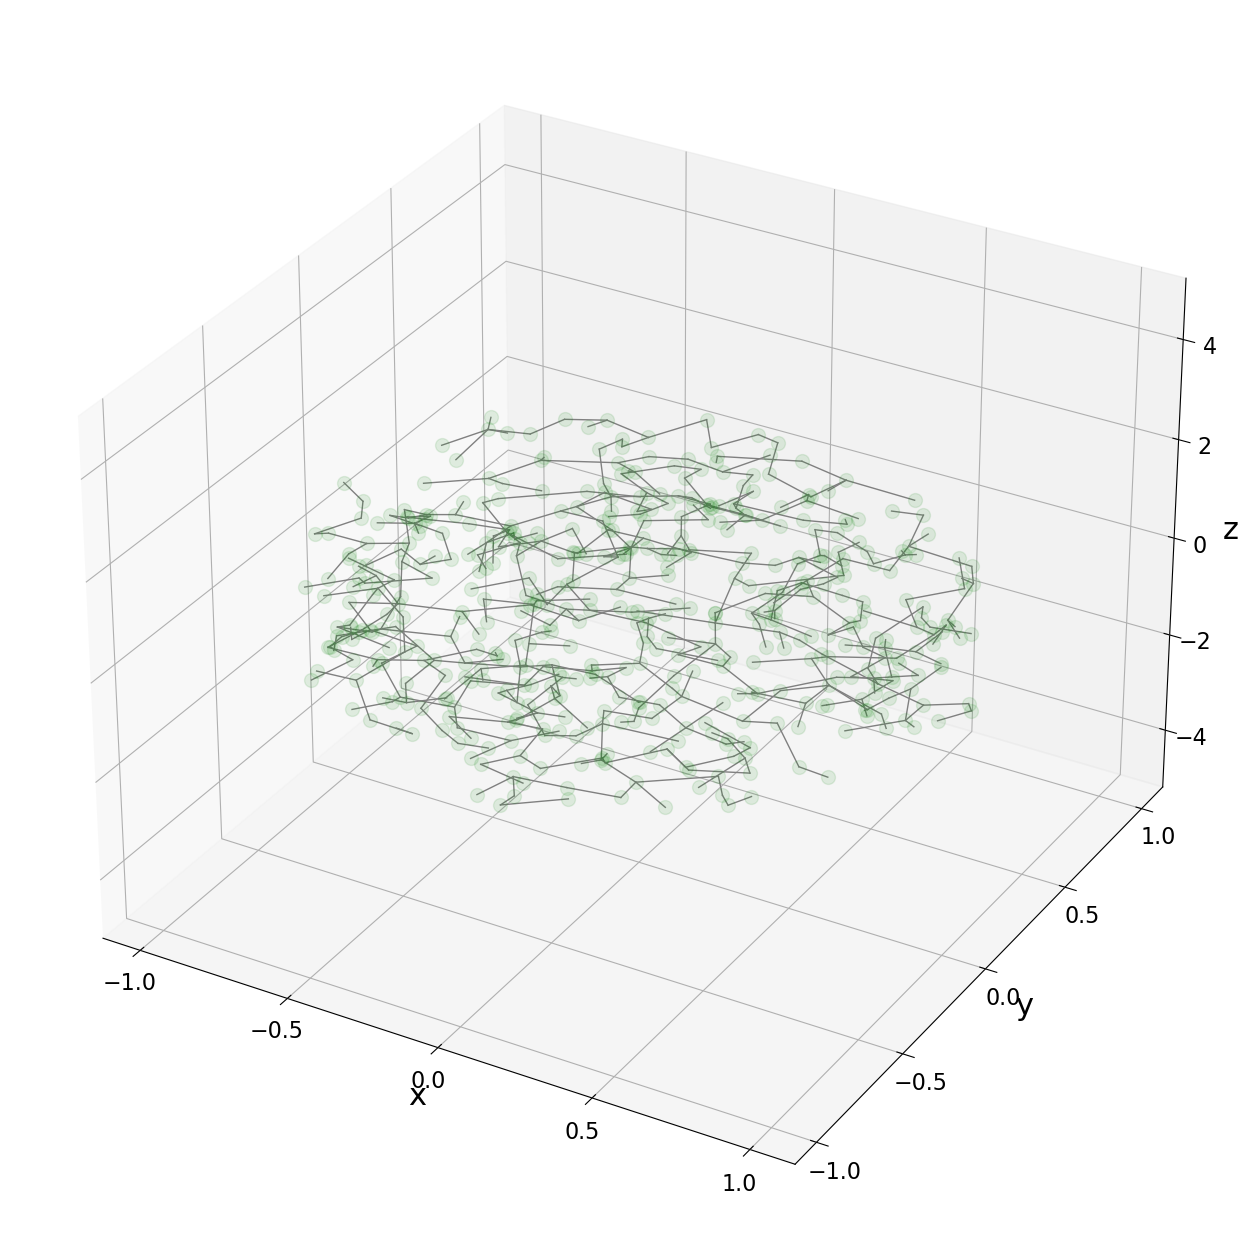

In [96]:
# random elevation
# minimum spanning tree 

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker


# Generate random geometric graph
num_nodes = 500
radius = 0.1

#positions = {i: np.random.uniform(-radius, radius, size=3) for i in range(num_nodes)}
#print('pos= ',positions)

# generate random points
z_max = 1.0
sigma = 1.0
r = np.random.uniform(low=0, high=1, size=num_nodes)  # radius
theta = np.random.uniform(low=0, high=2*np.pi, size=num_nodes)  # angle
x = np.sqrt(r) * np.cos(theta)
y = np.sqrt(r) * np.sin(theta)
z = sigma*(2.0*np.random.uniform(low=0, high=1, size=num_nodes)-1.0)


positions = {i: (x[i],y[i],z[i]) for i in range(num_nodes)}
print('pos2= ',positions)

#break
### create MST
# complete weight graph
df_adj = pd.DataFrame(columns=('node_i', 'node_j', 'd3d'))
icount = 0
for i in range(1, num_nodes+1):
    for j in range(i+1, num_nodes+1):
        dx = x[i-1] - x[j-1]
        dy = y[i-1] - y[j-1]
        dz = z[i-1] - z[j-1]
        d3d_val = np.sqrt(dx**2+dy**2+dz**2)
        icount += 1
        df_adj.loc[icount] = [i,j,d3d_val]


df_adj = df_adj.astype({'node_i':'int'})
df_adj = df_adj.astype({'node_j':'int'})
# create weighted graph from the df
G3d = nx.from_pandas_edgelist(df_adj, 'node_i', 'node_j', create_using=nx.Graph(), edge_attr='d3d')
# compute MST over the graph G2d
G = nx.minimum_spanning_tree(G3d,weight='d3d', algorithm='kruskal', ignore_nan=False)


# Extract node positions
pos = positions #nx.get_node_attributes(G, 'pos')

# Plot the graph
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

# Plot nodes
for node, position in pos.items():
    ax.scatter(position[0], position[1], position[2], color='g',s=100,alpha=0.1)


# Plot edges
for edge in G.edges():
    u = edge[0] - 1
    v = edge[1] - 1
    #print('edge= ',u,v)
    #print('pos0= ',pos[u])
    #print('pos1= ',pos[v])
    #ax.plot([pos[edge[0]][0], pos[edge[1]][0]],
    #        [pos[edge[0]][1], pos[edge[1]][1]],
    #        [pos[edge[0]][2], pos[edge[1]][2]], color='grey',linewidth=1)
    ax.plot([pos[u][0], pos[v][0]],
            [pos[u][1], pos[v][1]],
            [pos[u][2], pos[v][2]], color='grey',linewidth=1)

# Set labels and title
ax.set_xlabel('x',fontsize=22)
ax.set_ylabel('y',fontsize=22)
ax.set_zlabel('z',fontsize=22)
#ax.set_title('Random Geometric Graph on a gaussian surface')
tick_spacing = 0.5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.zaxis.set_tick_params(labelsize=16)

zmin = -5.0
zmax = -zmin
ax.set_zlim([zmin, zmax])
# Get rid of colored axes planes
# Bonus: To get rid of the grid as well:
#ax.grid(False)
plt.show()
                      

